# Multivariate visualizations to statistics

## Limited utility of graphing vectors

Graphs are easy to understand and catchy when you want to explain something. You can convey a lot of information through a picture. However, as we saw, there is a limit to the extent of information you can show on the graph and still convey its meaning appropriately. 

Graphs do a good job in univariate and bivariate data analysis. They can even do a decent job in 4 dimensions by plotting 3 dimensional data points and using color as the 4th feature. However, it is hard to plot 5 features within a single plot. Even if you manage to plot 5 dimensions, it will be difficult to interpret the graph. So when you have multidimensional data, which can reach 1000s of features, you have to rely on multivariate statistics for analyzing the data before you explore visualizations. 

Statistics can help narrow down the list of significant features you can use for building a model. These reduced sets of features can be analyzed using graphs. Statistics will guide features or data to be visualized to gain more insights from the data. 

In [1]:
housing_prices <- read.csv("datasets/kc_house_data.csv")

In [3]:
t(head(housing_prices))

,1,2,3,4,5,6
X,1,2,3,4,5,6
id,7129300520,6414100192,5631500400,2487200875,1954400510,7237550310
date,20141013T000000,20141209T000000,20150225T000000,20141209T000000,20150218T000000,20140512T000000
price,221900,538000,180000,604000,510000,1225000
bedrooms,3,3,2,4,3,4
bathrooms,1.00,2.25,1.00,3.00,2.00,4.50
sqft_living,1180,2570,770,1960,1680,5420
sqft_lot,5650,7242,10000,5000,8080,101930
floors,1,2,1,1,1,1
waterfront,0,0,0,0,0,0


Let's see how the independent variables are correlated to the dependent variable price. Before we can run cor(), we'll need to ensure all the supplied features are numeric. 

In [5]:
# sapply applies the class function to each column of housing_prices_dataframe
t(sapply(housing_prices, class))

X,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
integer,numeric,factor,numeric,integer,numeric,integer,integer,numeric,integer,...,integer,integer,integer,integer,integer,integer,numeric,numeric,integer,integer


In [6]:
sapply(housing_prices, class)

X            id          date         price      bedrooms 
    "integer"     "numeric"      "factor"     "numeric"     "integer" 
    bathrooms   sqft_living      sqft_lot        floors    waterfront 
    "numeric"     "integer"     "integer"     "numeric"     "integer" 
         view     condition         grade    sqft_above sqft_basement 
    "integer"     "integer"     "integer"     "integer"     "integer" 
     yr_built  yr_renovated       zipcode           lat          long 
    "integer"     "integer"     "integer"     "numeric"     "numeric" 
sqft_living15    sqft_lot15 
    "integer"     "integer"

Notice that the date is a factor variable. We should exclude it from the cor() function. ID (while numeric) is just an indentifier so it's useless here. Let's exclude them both. 

In [9]:
lessData <- housing_prices[!names(housing_prices) %in% c("X", "id", "date")]

In [10]:
names(lessData)

[1] "price"         "bedrooms"      "bathrooms"     "sqft_living"  
 [5] "sqft_lot"      "floors"        "waterfront"    "view"         
 [9] "condition"     "grade"         "sqft_above"    "sqft_basement"
[13] "yr_built"      "yr_renovated"  "zipcode"       "lat"          
[17] "long"          "sqft_living15" "sqft_lot15"

In [11]:
cor(lessData)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.00000000,0.308349598,0.52513751,0.70203505,0.089660861,0.256793888,0.266369434,0.397293488,0.036361789,0.66743426,0.6055672984,0.32381602,0.05401153,0.126433793,-0.053202854,0.3070034800,0.02162624,0.585378904,0.082447153
bedrooms,0.30834960,1.000000000,0.51588364,0.57667069,0.031703243,0.175428935,-0.006582479,0.079531852,0.028472104,0.35696673,0.4776001614,0.30309338,0.15417807,0.018840823,-0.152668487,-0.0089310097,0.12947298,0.391637524,0.029244224
bathrooms,0.52513751,0.515883638,1.00000000,0.75466528,0.087739662,0.500653173,0.063743629,0.187737024,-0.124981933,0.66498253,0.6853424759,0.28377003,0.50601944,0.050738978,-0.203866274,0.0245729528,0.22304184,0.568634290,0.087175361
sqft_living,0.70203505,0.576670693,0.75466528,1.00000000,0.172825661,0.353949290,0.103817818,0.284611186,-0.058752587,0.76270448,0.8765965987,0.43504297,0.31804877,0.055362927,-0.199430043,0.0525294622,0.24022330,0.756420259,0.183285551
sqft_lot,0.08966086,0.031703243,0.08773966,0.17282566,1.000000000,-0.005200991,0.021603683,0.074710106,-0.008958250,0.11362112,0.1835122809,0.01528620,0.05308037,0.007643505,-0.129574486,-0.0856827882,0.22952086,0.144608174,0.718556752
floors,0.25679389,0.175428935,0.50065317,0.35394929,-0.005200991,1.000000000,0.023698320,0.029443820,-0.263767946,0.45818251,0.5238847103,-0.24570454,0.48931942,0.006338401,-0.059120642,0.0496141310,0.12541903,0.279885265,-0.011269187
waterfront,0.26636943,-0.006582479,0.06374363,0.10381782,0.021603683,0.023698320,1.000000000,0.401857351,0.016653157,0.08277491,0.0720745917,0.08058794,-0.02616109,0.092884837,0.030284728,-0.0142737756,-0.04191020,0.086463136,0.030703283
view,0.39729349,0.079531852,0.18773702,0.28461119,0.074710106,0.029443820,0.401857351,1.000000000,0.045989737,0.25132058,0.1676493441,0.27694658,-0.05343985,0.103917288,0.084826917,0.0061567321,-0.07839971,0.280439082,0.072574568
condition,0.03636179,0.028472104,-0.12498193,-0.05875259,-0.008958250,-0.263767946,0.016653157,0.045989737,1.000000000,-0.14467367,-0.1582136164,0.17410491,-0.36141656,-0.060617787,0.003025524,-0.0149410064,-0.10650045,-0.092824268,-0.003405523
grade,0.66743426,0.356966725,0.66498253,0.76270448,0.113621124,0.458182514,0.082774914,0.251320585,-0.144673671,1.00000000,0.7559229376,0.16839182,0.44696320,0.014414281,-0.184862093,0.1140840571,0.19837215,0.713202093,0.119247897


bathroom, sqft_living, grade, sqft_above, and sqft_living15 all "look" significant since they have a corelation greater than 0.5. How can you visualize these 5 features relative to the price? We can plot them...

In [12]:
options(scipen = 999) 

library(ggplot2)

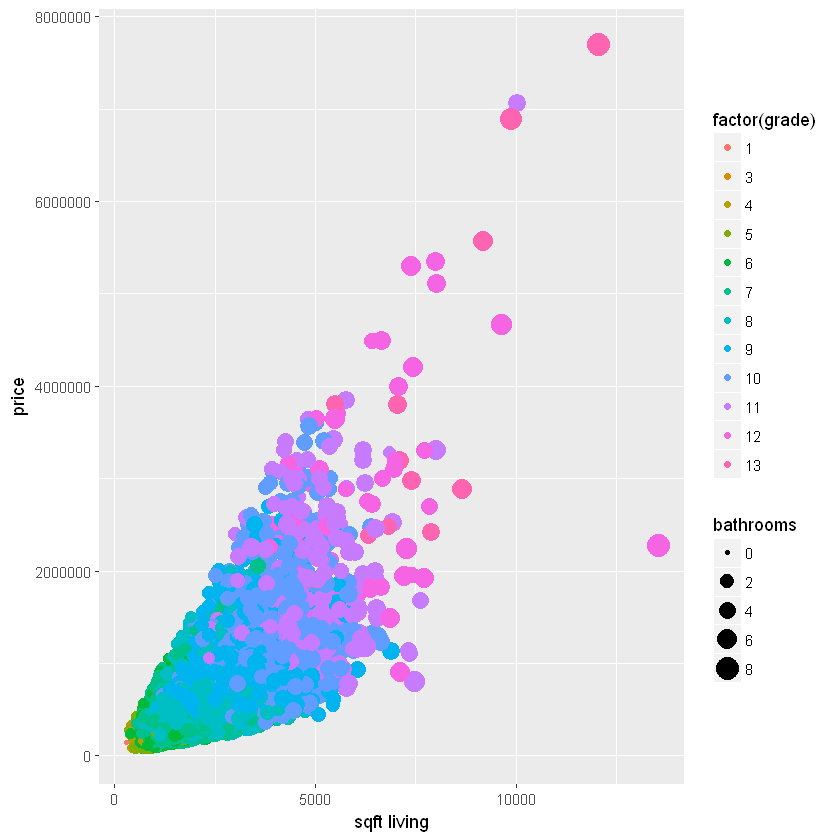

In [16]:
ggplot(lessData, aes(x = sqft_living, y = price), main("Price vs Sqft living area")) + 
    geom_point(aes(color = factor(grade), size = bathrooms)) + 
    xlab("sqft living") + 
    ylab("price")


Houses with 0 bathrooms and 0 bedrooms are typical outliers. Let's remove them and redo this

In [17]:
lessData <- lessData[!lessData$bedrooms %in% c(0) & !lessData$bathrooms %in% c(0), ]

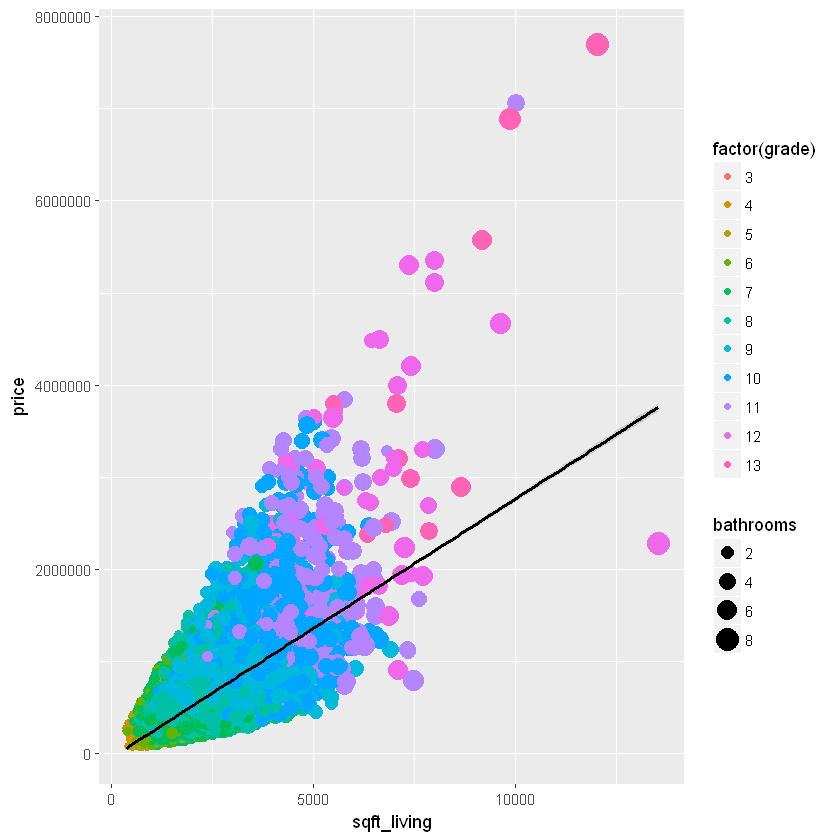

In [19]:
ggplot(lessData, aes(x = sqft_living, y = price), main("Price vs Sqft living area")) +
    geom_point(aes(color = factor(grade), size = bathrooms)) + 
    geom_smooth(method = lm, color = "black")

This plot does well summarizing price against sqft_living but explains little about how price correlates with sqft_above or number of bathrooms. The size of the datapoints denote the sqft_above. Since the observations are closely packed, we are not able to identify the trend in the data along the sqft_living. Bathrooms, when used as a factor, has 29 levels and that makes it difficult to interpret as well. 

We can also try plotting in 3 dimensional to see if size and color parameters help us in analyzing multiple diemnsions in the data. 

In [23]:
library(scatterplot3d)

In [24]:
lessData$colors[lessData$bathrooms < 2] <- "red"
lessData$colors[lessData$bathrooms == 2] <- "blue"
lessData$colors[lessData$bathrooms > 2] <- "green"
lessData$colors[lessData$bathrooms > 3] <- "magenta"
lessData$colors[lessData$bathrooms > 4] <- "cyan"

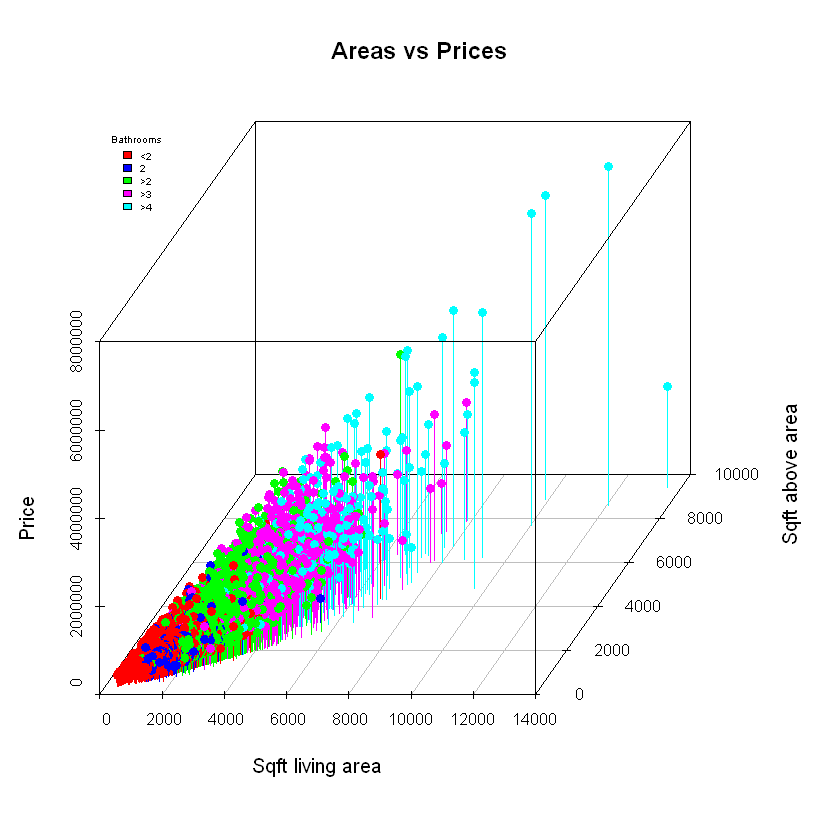

In [25]:
with(lessData,{
        
     scatterplot3d(sqft_living, sqft_above, price, 
                      type = "h",
                      angle = 45, 
                      pch = 16,
                      color = lessData$colors,
                      main = "Areas vs Prices",
                      xlab = "Sqft living area",
                      ylab = "Sqft above area",
                      zlab = "Price"                                             
                  )
     
     legend("topleft", inset = 0.05, bty = "n", cex = 0.5, title = "Bathrooms", 
               c("<2", "2", ">2", ">3", ">4"), 
               fill = c("red", "blue", "green", "magenta", "cyan")
           )
     
    })

While we have been able to incorporate additional features of the data into the plot, we can see we have reached the limit in dimensionality of the data that can be visually inspected. 

## Feature selection

Feature selection is the process of choosing relevant features from a dataset to perform modelling and machine learning tasks.